<a href="https://colab.research.google.com/github/Shallom12/Autonomous-driving-of-Chungnam-Human-Resources-Development-Institute/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EA%B2%BD%EC%98%81_MNIST_CNN%2C_SVM%2C_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8690 - loss: 0.4327 - val_accuracy: 0.9793 - val_loss: 0.0673
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9821 - loss: 0.0560 - val_accuracy: 0.9862 - val_loss: 0.0484
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0342 - val_accuracy: 0.9864 - val_loss: 0.0431
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9912 - loss: 0.0282 - val_accuracy: 0.9888 - val_loss: 0.0396
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9945 - loss: 0.0184 - val_accuracy: 0.9883 - val_loss: 0.0402
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9864 - loss: 0.0377
Test Accuracy: 0.9892


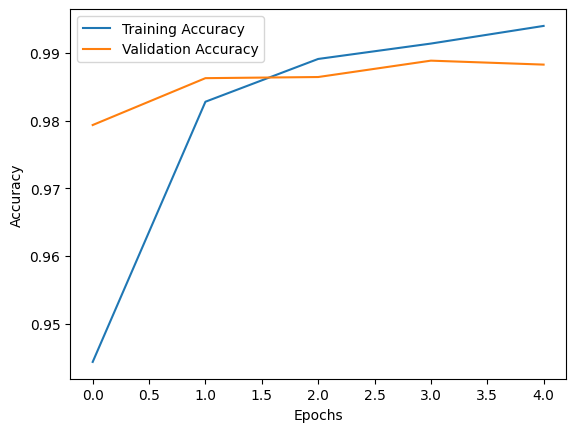

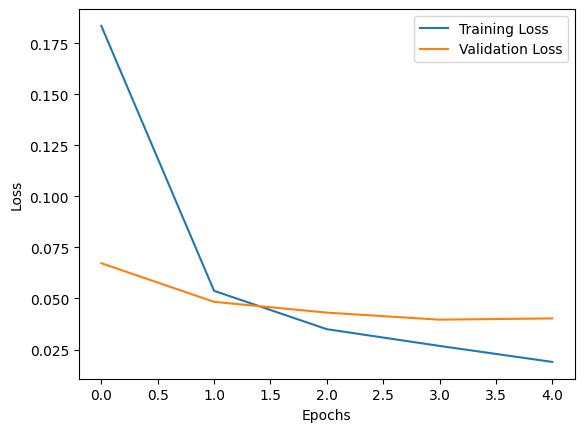

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


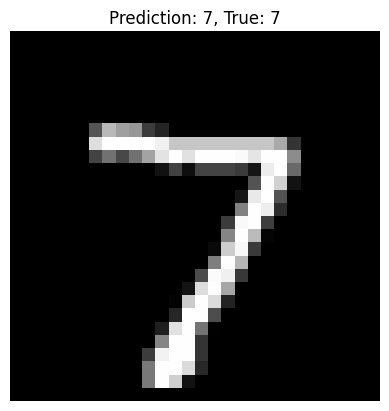

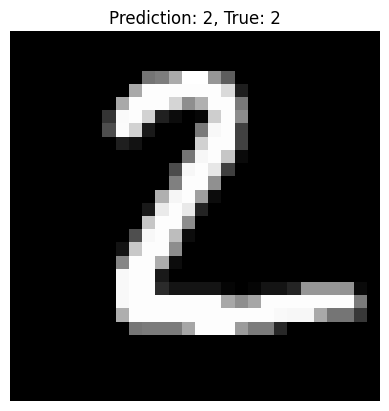

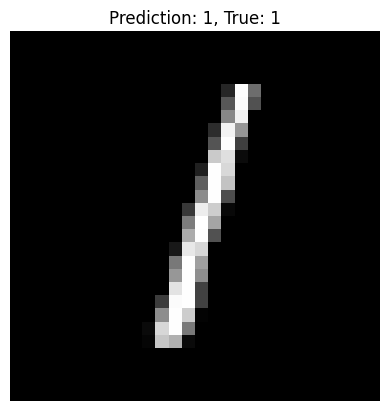

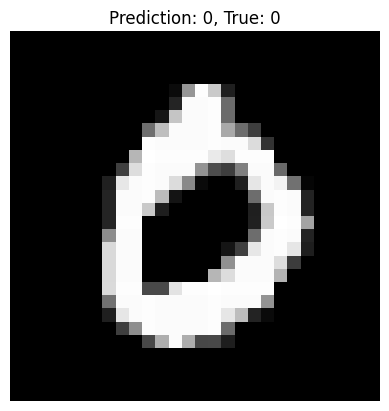

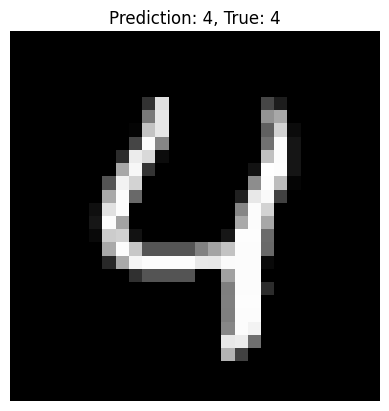

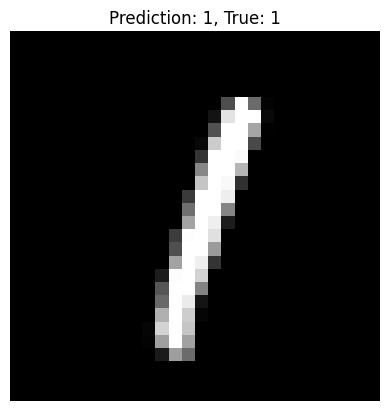

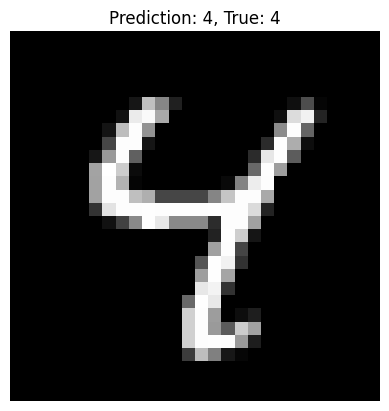

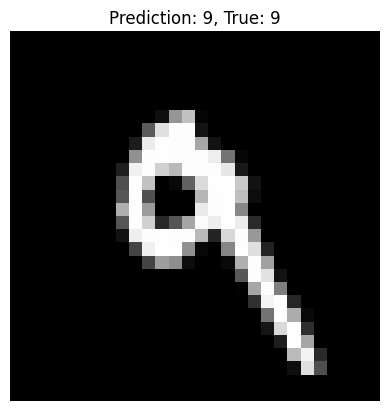

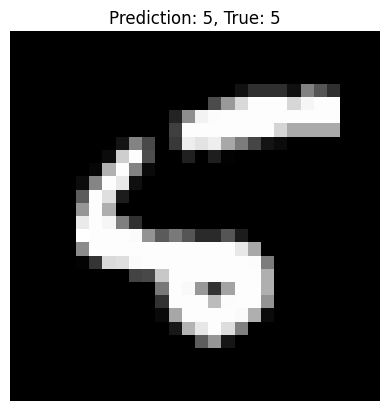

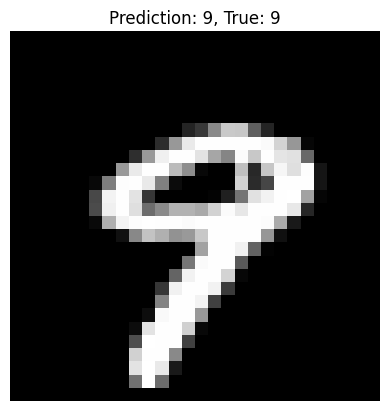

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values to [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Visualize training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display sample predictions
predictions = model.predict(x_test[:10])
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {predictions[i].argmax()}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()


Training SVM...
SVM Accuracy: 0.9630
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.92      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.93      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

Training k-NN...
k-NN Accuracy: 0.9701
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
  

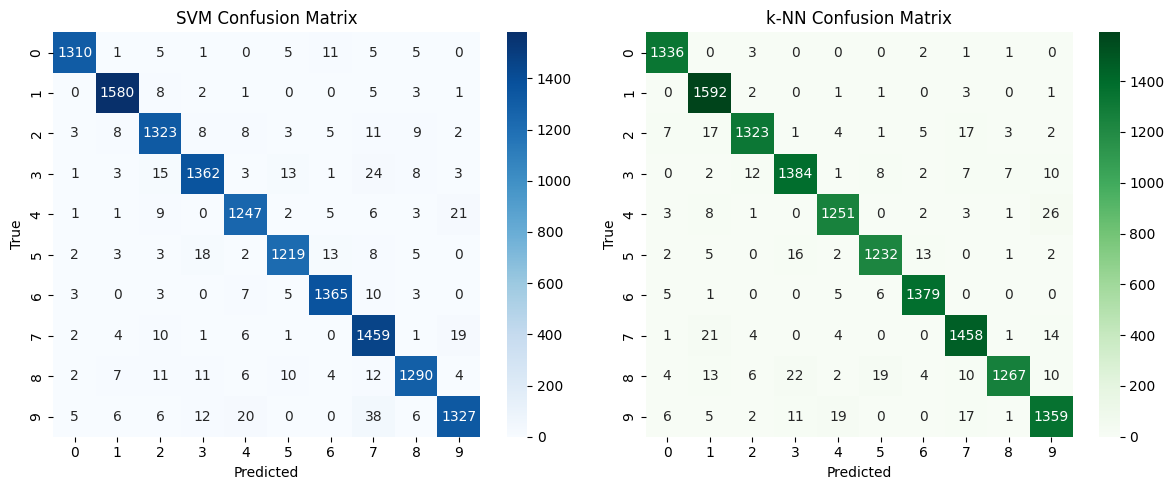

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Normalize pixel values to [0, 1]
X = X / 255.0

# Convert labels to integers
y = y.astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for SVM (optional for k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- SVM Model ----
print("Training SVM...")
svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)

# SVM Evaluation
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(classification_report(y_test, svm_predictions))

# ---- k-NN Model ----
print("Training k-NN...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# k-NN Evaluation
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"k-NN Accuracy: {knn_accuracy:.4f}")
print(classification_report(y_test, knn_predictions))



plt.figure(figsize=(12, 5))

# SVM Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# k-NN Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Greens')
plt.title('k-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()
